In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sys
sys.path.append("..")

import cfg

In [3]:
NOISE_LEVELS = cfg.experiment.noise_levels; NOISE_LEVELS

array([0.   , 0.01 , 0.02 , 0.03 , 0.04 , 0.05 , 0.075, 0.1  , 0.125,
       0.15 , 0.175, 0.2  , 0.9  ])

In [4]:
import pdb

In [9]:
def mean_std(results):
    results.sort_values('noise_level_test', inplace=True)
    values = results['f1_test'].values.reshape(-1, 10)
    stds = np.std(values, axis=1)
    means = np.mean(values, axis=1)
    return means, stds

def plot_results(results, color, label, ci=True):
    linestyle = color[1:]
    color = color[0]
    grouped = results.groupby(results.noise_level_train)
    means = grouped['f1_test'].mean()
    stds = grouped['f1_test'].std()
#     _noise_levels = noise_levels[:len(means)]
    _noise_levels = grouped.groups.keys()
    plt.plot(_noise_levels, means, linestyle=linestyle, color=color, label=label)
    if ci:
        plt.fill_between(_noise_levels, means - 2*stds, means + 2*stds, alpha=.25, color=color)
    plt.legend()

def plot_results_from(filepath, color, name, type_='noised', crutch=False, **kwargs):
    results = pd.read_csv(filepath)
    if type_ == 'noised':
#         results = results[results['noise_level_test'] > 0]
        results = results[results['noise_level_test'] == results['noise_level_train']]
    else:
        results = results[results['noise_level_test'] == -1]
    plot_results(results, color, name, **kwargs)

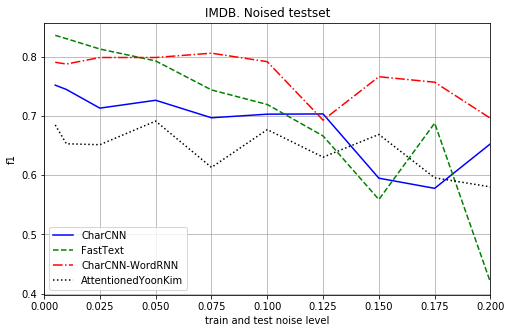

In [53]:
plt.figure(figsize=(8, 5))
plt.title('IMDB. Noised testset')
plt.xlabel('train and test noise level')
plt.ylabel('f1')
plt.xlim(0, 0.2)
# plt.ylim(0.65, 0.85)
plot_results_from('/data/misc/vladislav_repo/text_classification/results/CharCNN_IMDB.csv', 'b-', 'CharCNN')
plot_results_from('/data/misc/vladislav_repo/text_classification/results/FastTextGRU_IMDB.csv', 'g--', 'FastText')
plot_results_from('/data/misc/vladislav_repo/text_classification/results/YoonKim_IMDB.csv', 'r-.', 'CharCNN-WordRNN')
plot_results_from('/data/misc/vladislav_repo/text_classification/results/Attention_IMDB.csv', 'k:', 'AttentionedYoonKim')
# plot_results_from('../../robust-w2v/results/rove_imdb.csv', 'm', 'RoVe')
plt.grid()

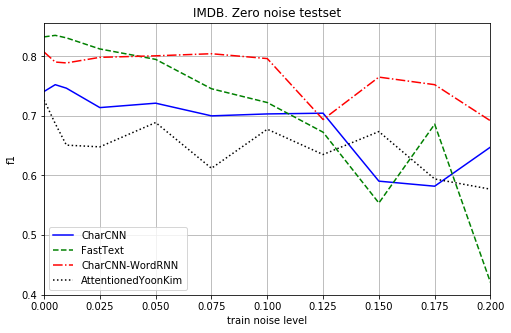

In [35]:
plt.figure(figsize=(8, 5))
plt.title('IMDB. Zero noise testset')
plt.xlabel('train noise level')
plt.ylabel('f1')
plt.xlim(0, 0.2)
# plt.ylim(0.65, 0.85)
plot_results_from('/data/misc/vladislav_repo/text_classification/results/CharCNN_IMDB.csv', 'b-', 'CharCNN', type_='original')
plot_results_from('/data/misc/vladislav_repo/text_classification/results/FastTextGRU_IMDB.csv', 'g--', 'FastText', type_='original')
plot_results_from('/data/misc/vladislav_repo/text_classification/results/YoonKim_IMDB.csv', 'r-.', 'CharCNN-WordRNN', type_='original')
plot_results_from('/data/misc/vladislav_repo/text_classification/results/Attention_IMDB.csv', 'k:', 'AttentionedYoonKim', type_='original')
plt.grid()

In [61]:
pd.read_csv('/data/misc/vladislav_repo/text_classification/results/CharCNN_mokoron_noemoji.csv')

,Unnamed: 0,acc_test,acc_train,data_desc,dropout,epochs,f1_test,f1_train,init_function,lr,model_desc,model_type,noise_level_test,noise_level_train,run_name,task,trainable_params
0,0,0.770358,0.954740,Maxlen 170,0.5,30,0.769822,0.954814,<function xavier_normal at 0x7fe7cd74d510>,0.0001,CharCNN(\n (embedding): Linear(in_features=10...,charCNN,0.000,0.000,runs/May13_20-49-28_phobos-aijun_charCNN_embed...,Mokoron binary classification,411050
1,1,0.765115,0.954740,Maxlen 170,0.5,30,0.765238,0.954814,<function xavier_normal at 0x7fe7cd74d510>,0.0001,CharCNN(\n (embedding): Linear(in_features=10...,charCNN,0.005,0.000,runs/May13_20-49-28_phobos-aijun_charCNN_embed...,Mokoron binary classification,411050
2,2,0.758922,0.954740,Maxlen 170,0.5,30,0.759666,0.954814,<function xavier_normal at 0x7fe7cd74d510>,0.0001,CharCNN(\n (embedding): Linear(in_features=10...,charCNN,0.010,0.000,runs/May13_20-49-28_phobos-aijun_charCNN_embed...,Mokoron binary classification,411050
3,3,0.748467,0.954740,Maxlen 170,0.5,30,0.750289,0.954814,<function xavier_normal at 0x7fe7cd74d510>,0.0001,CharCNN(\n (embedding): Linear(in_features=10...,charCNN,0.025,0.000,runs/May13_20-49-28_phobos-aijun_charCNN_embed...,Mokoron binary classification,411050
4,4,0.729611,0.954740,Maxlen 170,0.5,30,0.733492,0.954814,<function xavier_normal at 0x7fe7cd74d510>,0.0001,CharCNN(\n (embedding): Linear(in_features=10...,charCNN,0.050,0.000,runs/May13_20-49-28_phobos-aijun_charCNN_embed...,Mokoron binary classification,411050
5,5,0.708180,0.954740,Maxlen 170,0.5,30,0.715013,0.954814,<function xavier_normal at 0x7fe7cd74d510>,0.0001,CharCNN(\n (embedding): Linear(in_features=10...,charCNN,0.075,0.000,runs/May13_20-49-28_phobos-aijun_charCNN_embed...,Mokoron binary classification,411050
6,6,0.691593,0.954740,Maxlen 170,0.5,30,0.701096,0.954814,<function xavier_normal at 0x7fe7cd74d510>,0.0001,CharCNN(\n (embedding): Linear(in_features=10...,charCNN,0.100,0.000,runs/May13_20-49-28_phobos-aijun_charCNN_embed...,Mokoron binary classification,411050
7,7,0.677796,0.954740,Maxlen 170,0.5,30,0.690247,0.954814,<function xavier_normal at 0x7fe7cd74d510>,0.0001,CharCNN(\n (embedding): Linear(in_features=10...,charCNN,0.125,0.000,runs/May13_20-49-28_phobos-aijun_charCNN_embed...,Mokoron binary classification,411050
8,8,0.665870,0.954740,Maxlen 170,0.5,30,0.680092,0.954814,<function xavier_normal at 0x7fe7cd74d510>,0.0001,CharCNN(\n (embedding): Linear(in_features=10...,charCNN,0.150,0.000,runs/May13_20-49-28_phobos-aijun_charCNN_embed...,Mokoron binary classification,411050
9,9,0.653575,0.954740,Maxlen 170,0.5,30,0.670612,0.954814,<function xavier_normal at 0x7fe7cd74d510>,0.0001,CharCNN(\n (embedding): Linear(in_features=10...,charCNN,0.175,0.000,runs/May13_20-49-28_phobos-aijun_charCNN_embed...,Mokoron binary classification,411050


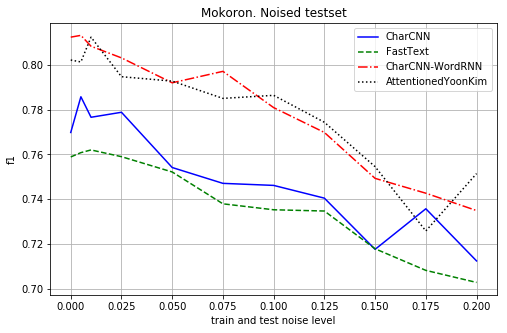

In [11]:
plt.figure(figsize=(8, 5))
plt.title('Mokoron. Noised testset')
plt.xlabel('train and test noise level')
plt.ylabel('f1')
# plt.xlim(0, 0.2)
# plt.ylim(0.3, 0.55)
plot_results_from('/data/misc/vladislav_repo/text_classification/results/CharCNN_mokoron_noemoji.csv', 'b-', 'CharCNN')
plot_results_from('/data/misc/vladislav_repo/text_classification/results/FastTextGRU_mokoron.csv', 'g--', 'FastText')
plot_results_from('/data/misc/vladislav_repo/text_classification/results/YoonKim_marakon_noemoji.csv', 'r-.', 'CharCNN-WordRNN')
plot_results_from('/data/misc/vladislav_repo/text_classification/results/AttentionedYoonKim_mokoron_heads1.csv', 'k:', 'AttentionedYoonKim')
plt.grid()

In [ ]:
plt.figure(figsize=(8, 5))
plt.title('Mokoron. Noised testset')
plt.xlabel('train and test noise level')
plt.ylabel('f1')
# plt.xlim(0, 0.2)
# plt.ylim(0.3, 0.55)
plot_results_from('/data/misc/vladislav_repo/text_classification/results/CharCNN_mokoron_noemoji.csv', 'b-', 'CharCNN')
plot_results_from('/data/misc/vladislav_repo/text_classification/results/FastTextGRU_mokoron.csv', 'g--', 'FastText')
plot_results_from('/data/misc/vladislav_repo/text_classification/results/YoonKim_marakon_noemoji.csv', 'r-.', 'CharCNN-WordRNN')
plot_results_from('/data/misc/vladislav_repo/text_classification/results/AttentionedYoonKim_mokoron_heads1.csv', 'k:', 'AttentionedYoonKim')
plt.grid()